P6. Using CAMB, plot the evolution of the density parameters for matter, radiation, dark energy and curvature.

In [71]:
import camb
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.6.1


In [72]:
# Definición de la cosmología
H0 = 67.4 # hm/(sMpc)
omega_m = 0.315 # matter
omega_ch2 = 0.120 # CDM
omega_bh2 = 0.0224 # materia bariónica
ns = 0.965 # índice espectral
tau = 0.054

In [73]:
# help(camb.CAMBparams)
pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0, ombh2 = omega_bh2, omch2 = omega_ch2, tau = tau)
pars.set_dark_energy(w=-1.0)
results = camb.get_results(pars)
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.0224
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24586829360147697
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

In [74]:
# Definimos redshift, factor de escala
z = np.linspace(0, 3000, 1000)
a = 1.0 / (1.0 + z)

In [75]:
# Necesitamos los parámetros de densidad de materia, radiación, dark energy y curvatura. Los obtenemos usando CAMB
Omega_m = results.get_Omega('cdm', z) + results.get_Omega('baryon', z) + results.get_Omega('nu', z)
Omega_r = results.get_Omega('photon', z) +  results.get_Omega('neutrino', z)
Omega_DE =  results.get_Omega('de', z)
Omega_k =  1 - Omega_m - Omega_r - Omega_DE # La suma de los Omega debe ser igual a 1

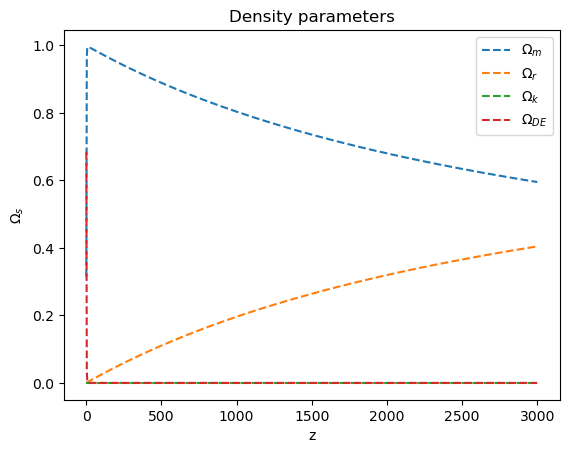

In [76]:
plt.figure()
plt.plot(z, Omega_m, label = r'$\Omega_m$', linestyle = 'dashed')
plt.plot(z, Omega_r, label = r'$\Omega_r$',linestyle = 'dashed')
plt.plot(z, Omega_k, label = r'$\Omega_k$',linestyle = 'dashed')
plt.plot(z, Omega_DE,label = r'$\Omega_{DE}$',linestyle = 'dashed')
plt.title('Density parameters')
plt.xlabel('z')
plt.ylabel('$\Omega_s$')
plt.legend()
plt.show()